In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Concatenate, Dropout,Attention
from tensorflow.keras.optimizers import Adam
import os

Student for Math dataset from https://www.kaggle.com/datasets/whenamancodes/student-performance

In [2]:
file_path = '/Users/Fikry/datasets/Maths.xlsx'
df_student = pd.read_excel(file_path)
df_student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0
394,MS,M,19.0,U,LE3,T,1.0,1.0,other,at_home,...,3.0,2.0,3.0,3.0,3.0,5.0,5.0,8.0,9.0,9.0
395,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0


In [3]:
df_student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df_student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df_student.duplicated().sum()

2

In [6]:
df_duplicated = df_student[df_student.duplicated()]
df_duplicated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
395,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
396,MS,M,19.0,R,GT3,T,1.0,1.0,other,services,...,4.0,3.0,2.0,1.0,3.0,5.0,0.0,6.0,5.0,0.0


Data is eligimates duplicated

In [7]:
#Grade	Description
#G1	first period grade (numeric: from 0 to 20)
#G2	second period grade (numeric: from 0 to 20)
#G3	final grade (numeric: from 0 to 20, output target)

df_student_zero_g3 = df_student[df_student["G3"] == 0.0]
df_student_zero_g3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18.0,R,GT3,T,2.0,2.0,services,other,...,3.0,3.0,3.0,1.0,2.0,4.0,0.0,7.0,4.0,0.0
130,GP,F,15.0,R,GT3,T,3.0,4.0,services,teacher,...,4.0,2.0,2.0,2.0,2.0,5.0,0.0,12.0,0.0,0.0
131,GP,F,15.0,U,GT3,T,1.0,1.0,at_home,other,...,4.0,3.0,3.0,1.0,2.0,4.0,0.0,8.0,0.0,0.0
134,GP,M,15.0,R,GT3,T,3.0,4.0,at_home,teacher,...,5.0,3.0,3.0,1.0,1.0,5.0,0.0,9.0,0.0,0.0
135,GP,F,15.0,U,GT3,T,4.0,4.0,services,at_home,...,4.0,3.0,3.0,1.0,1.0,5.0,0.0,11.0,0.0,0.0
136,GP,M,17.0,R,GT3,T,3.0,4.0,at_home,other,...,5.0,4.0,5.0,2.0,4.0,5.0,0.0,10.0,0.0,0.0
137,GP,F,16.0,U,GT3,A,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,1.0,5.0,0.0,4.0,0.0,0.0
140,GP,M,15.0,U,GT3,T,4.0,3.0,teacher,services,...,2.0,2.0,2.0,1.0,1.0,3.0,0.0,7.0,9.0,0.0
144,GP,M,17.0,U,GT3,T,2.0,1.0,other,other,...,5.0,4.0,5.0,1.0,2.0,5.0,0.0,5.0,0.0,0.0
146,GP,F,15.0,U,GT3,T,3.0,2.0,health,services,...,3.0,3.0,2.0,1.0,1.0,3.0,0.0,6.0,7.0,0.0


In [8]:
df_student["G3"].value_counts()

10.0    56
11.0    47
0.0     39
15.0    33
8.0     32
13.0    31
12.0    31
9.0     28
14.0    27
6.0     16
16.0    16
18.0    12
7.0      9
5.0      7
17.0     6
19.0     5
20.0     1
4.0      1
Name: G3, dtype: int64

In [9]:
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


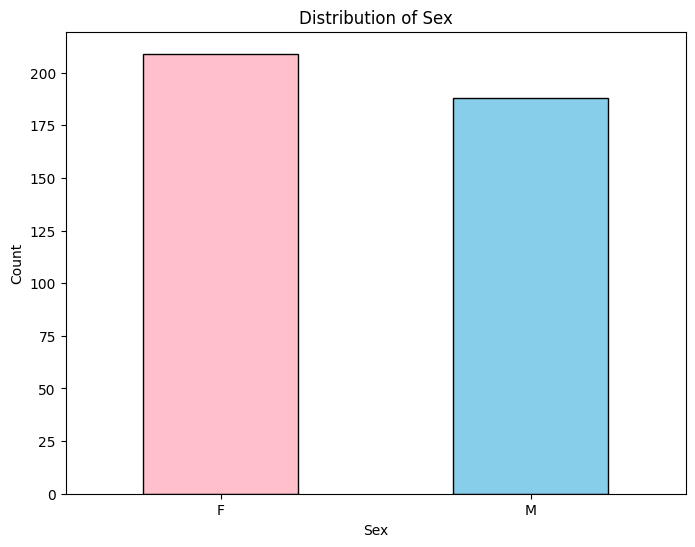

In [10]:
plt.figure(figsize=(8, 6))
df_student['sex'].value_counts(sort=False).plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.xticks(rotation=0)
plt.show()

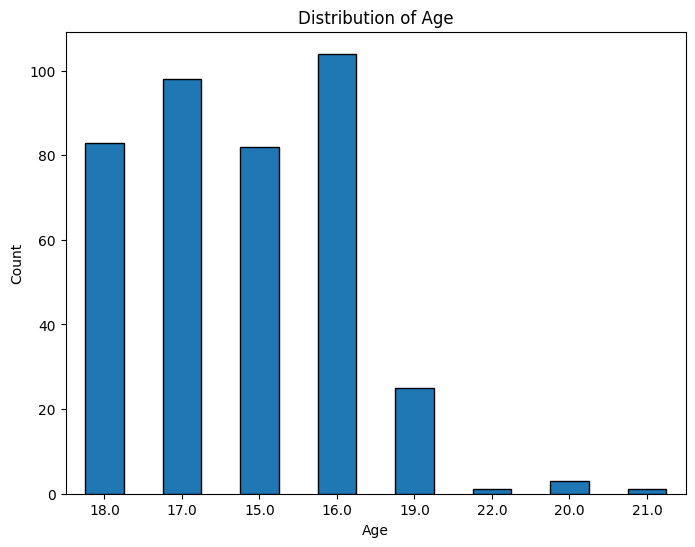

In [11]:
plt.figure(figsize=(8, 6))
df_student['age'].value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=0)
plt.show()

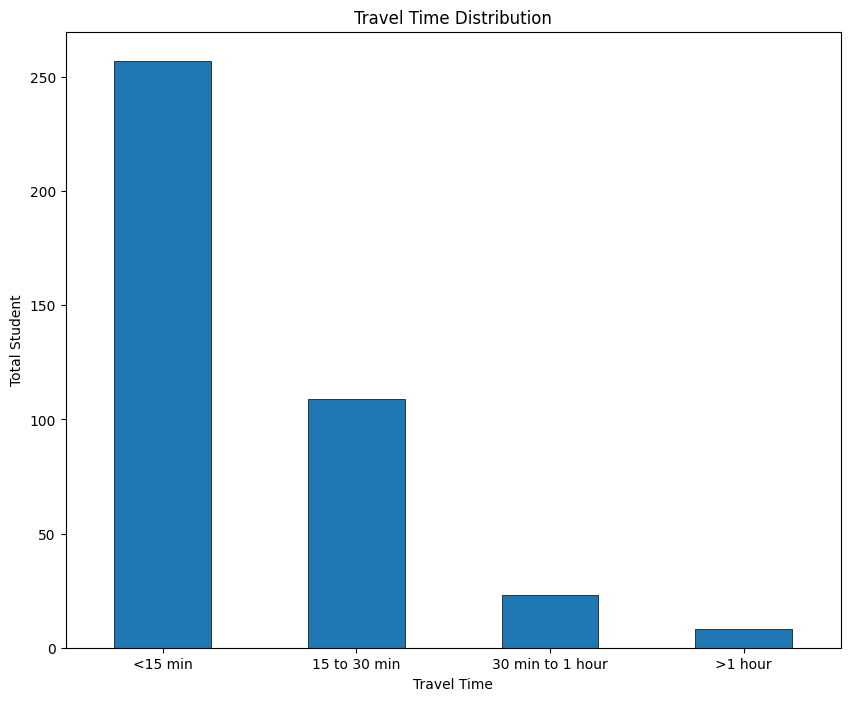

In [12]:
travel_time_mapping = {
    1: "<15 min",
    2: "15 to 30 min",
    3: "30 min to 1 hour",
    4: ">1 hour"
}

plt.figure(figsize=[10, 8])
ax = df_student['traveltime'].value_counts(sort=False).sort_index().plot(
    kind='bar', 
    edgecolor='black',
    linewidth=0.5
)

ax.set_xticklabels(
    [travel_time_mapping.get(i, i) for i in df_student['traveltime'].value_counts().sort_index().index],
    rotation=0
)

plt.xlabel('Travel Time')
plt.ylabel('Total Student')
plt.title('Travel Time Distribution')
plt.show()


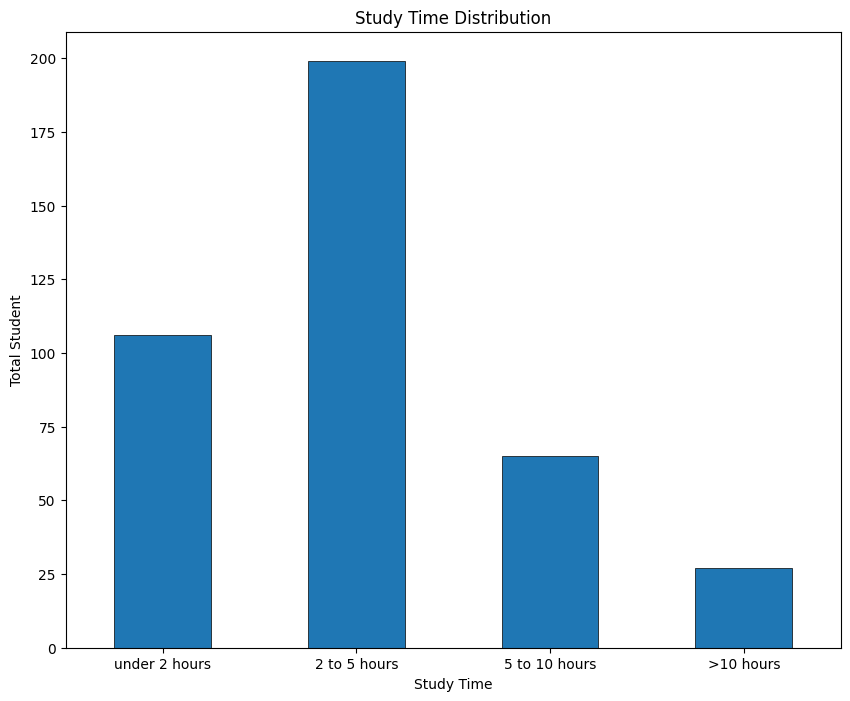

In [13]:
Studytime = {
    1: "under 2 hours",
    2: "2 to 5 hours",
    3: "5 to 10 hours",
    4: ">10 hours"
}

plt.figure(figsize=[10, 8])
ax = df_student['studytime'].value_counts().sort_index().plot(
    kind='bar', 
    edgecolor='black',
    linewidth=0.5
)

ax.set_xticklabels(
    [Studytime.get(i, i) for i in df_student['traveltime'].value_counts().sort_index().index],
    rotation=0
)

plt.xlabel('Study Time')
plt.ylabel('Total Student')
plt.title('Study Time Distribution')
plt.show()


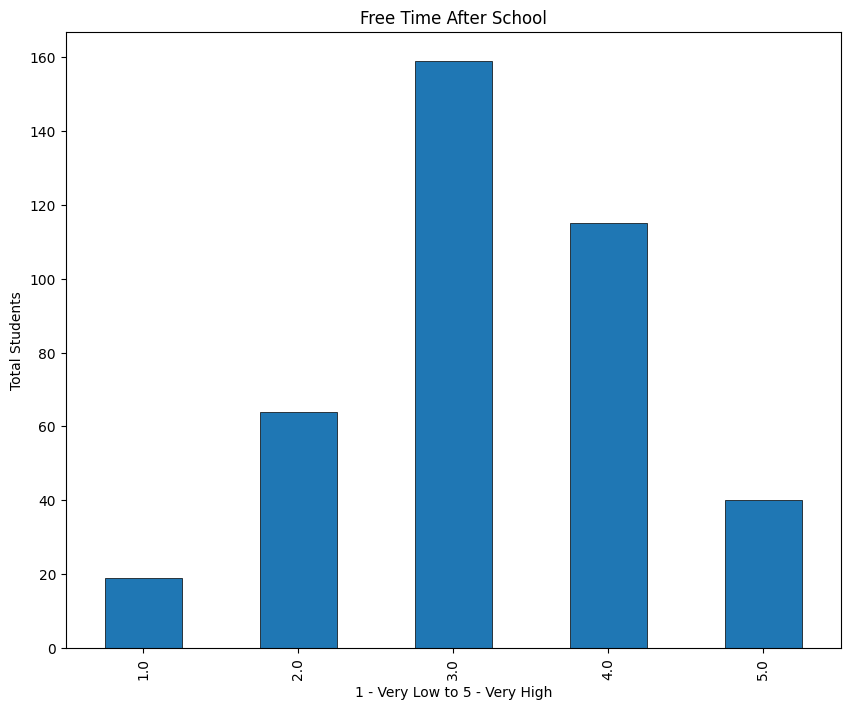

In [14]:
plt.figure(figsize=[10, 8])
ax = df_student['freetime'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('1 - Very Low to 5 - Very High')
plt.ylabel('Total Students')
plt.title('Free Time After School')
plt.show()

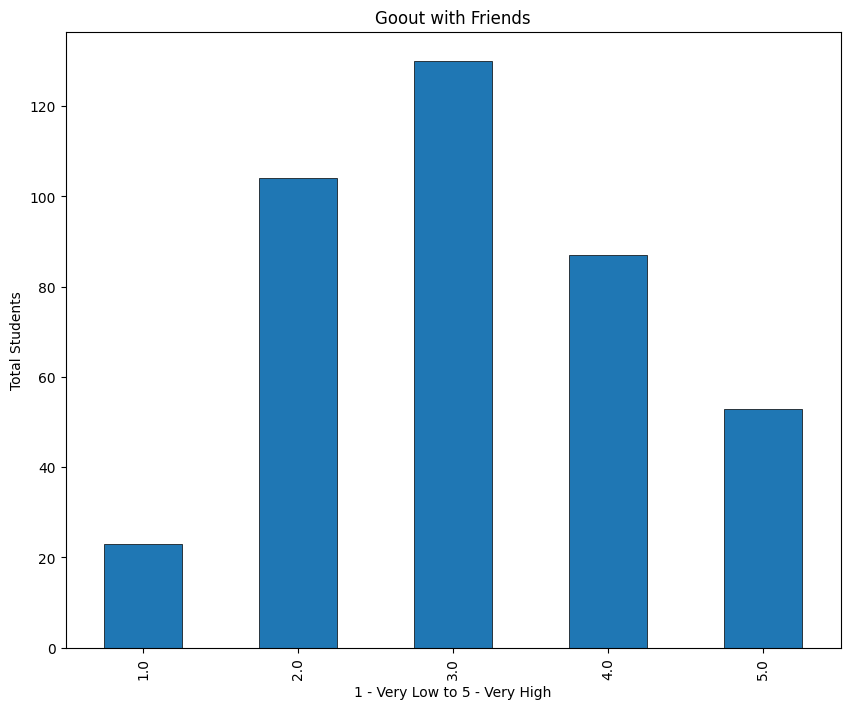

In [15]:
plt.figure(figsize=[10, 8])
ax = df_student['goout'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('1 - Very Low to 5 - Very High')
plt.ylabel('Total Students')
plt.title('Goout with Friends')
plt.show()

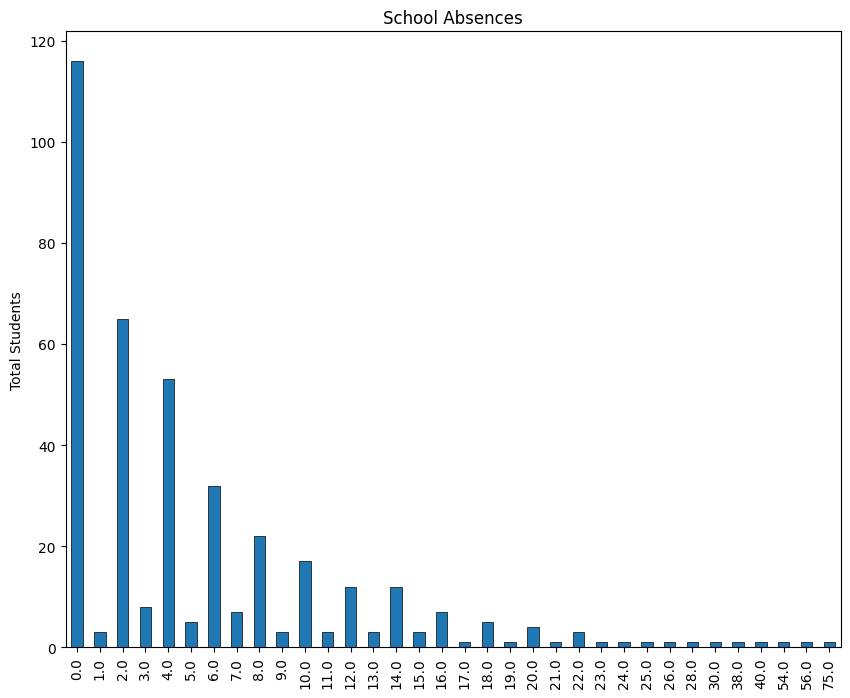

In [16]:
plt.figure(figsize=[10, 8])
ax = df_student['absences'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('')
plt.ylabel('Total Students')
plt.title('School Absences')
plt.show()

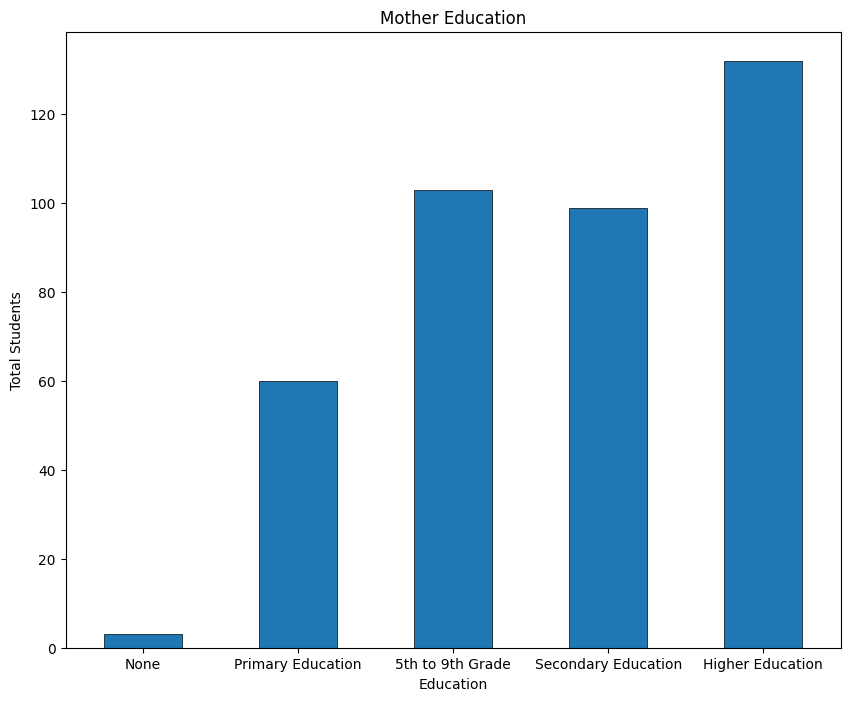

In [17]:
edu = {
    0: "None",
    1: "Primary Education",
    2: "5th to 9th Grade",
    3: "Secondary Education",
    4: "Higher Education"
}

plt.figure(figsize=[10, 8])
ax = df_student['Medu'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)

ax.set_xticklabels(
    [edu.get(i, i) for i in df_student['Medu'].value_counts().sort_index().index],
    rotation=0
)
plt.xlabel('Education')
plt.ylabel('Total Students')
plt.title('Mother Education')
plt.show()

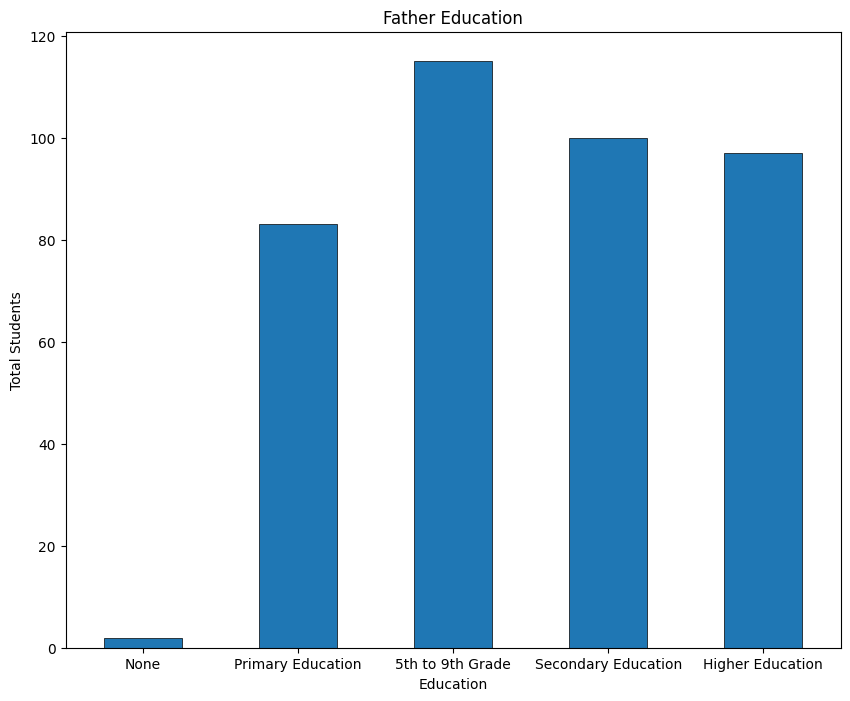

In [18]:
edu = {
    0: "None",
    1: "Primary Education",
    2: "5th to 9th Grade",
    3: "Secondary Education",
    4: "Higher Education"
}

plt.figure(figsize=[10, 8])
ax = df_student['Fedu'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
ax.set_xticklabels(
    [edu.get(i, i) for i in df_student['Fedu'].value_counts().sort_index().index],
    rotation=0
)
plt.xlabel('Education')
plt.ylabel('Total Students')
plt.title('Father Education')
plt.show()

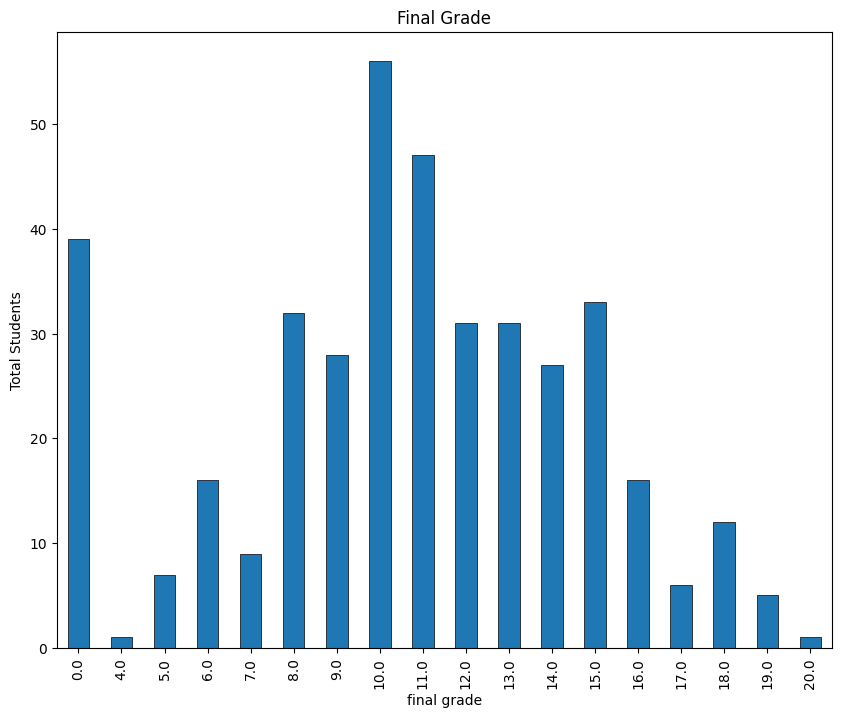

In [19]:
plt.figure(figsize=[10, 8])
ax = df_student['G3'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('final grade')
plt.ylabel('Total Students')
plt.title('Final Grade')
plt.show()

Find Relationship between between variables and Final Grade (G3)

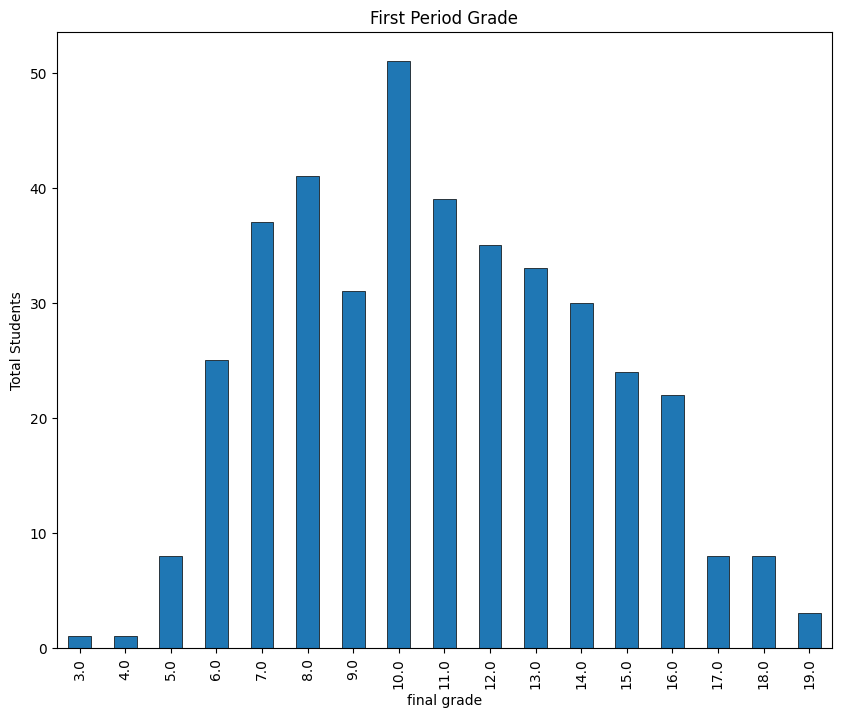

In [20]:
plt.figure(figsize=[10, 8])
ax = df_student['G1'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('final grade')
plt.ylabel('Total Students')
plt.title('First Period Grade')
plt.show()

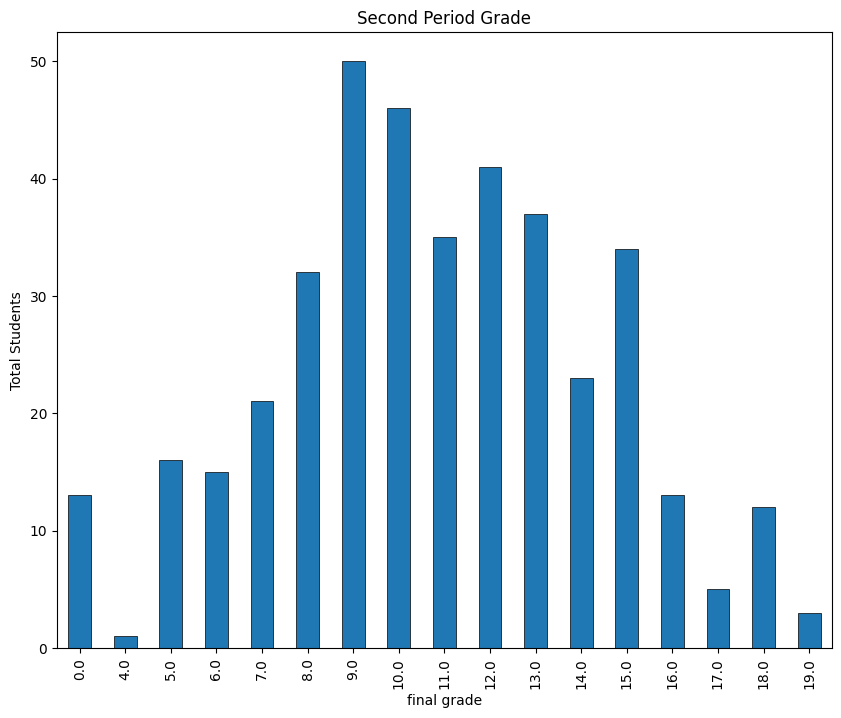

In [21]:
plt.figure(figsize=[10, 8])
ax = df_student['G2'].value_counts().sort_index().plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('final grade')
plt.ylabel('Total Students')
plt.title('Second Period Grade')
plt.show()

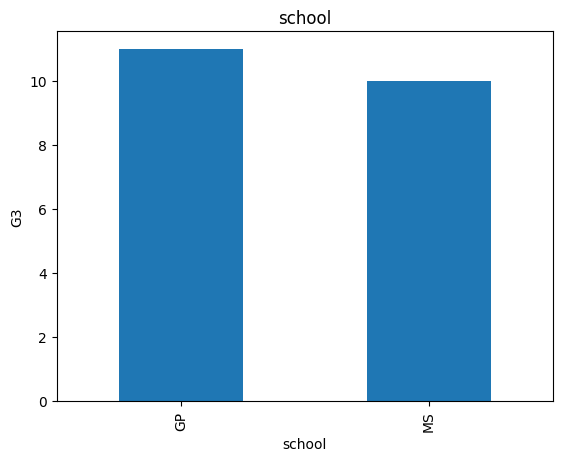

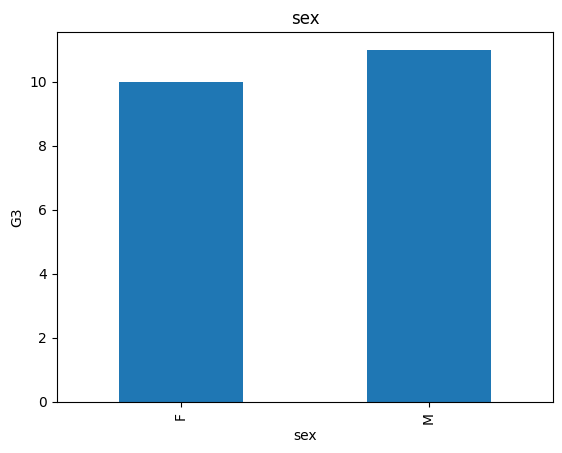

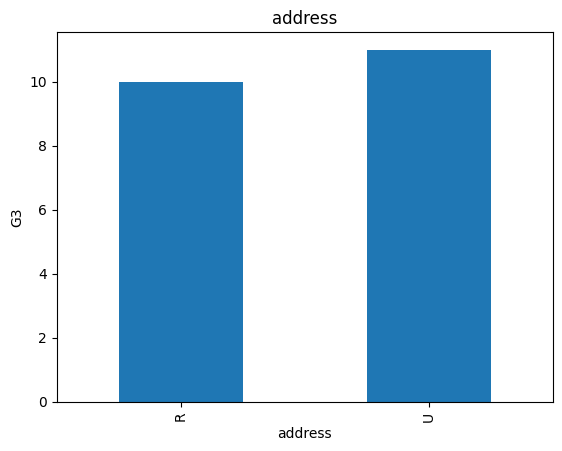

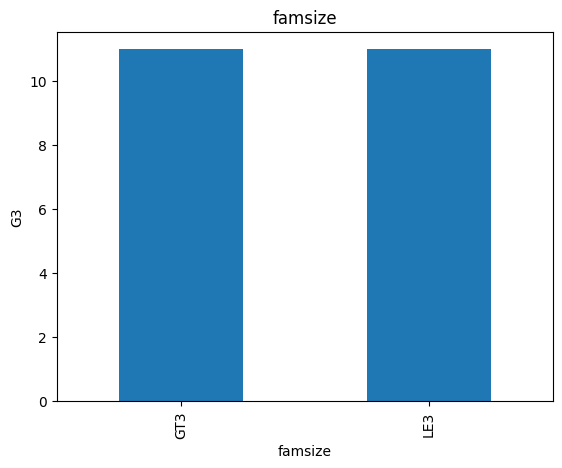

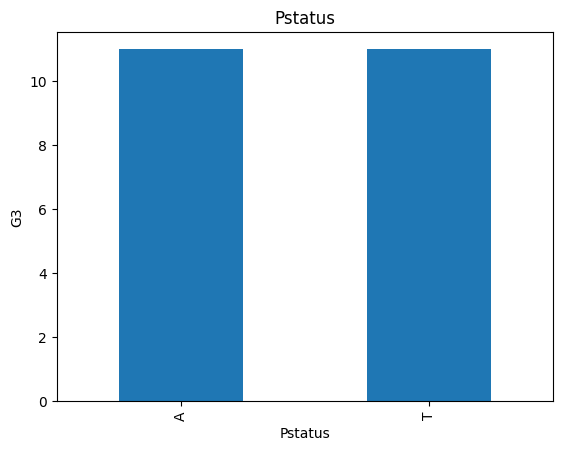

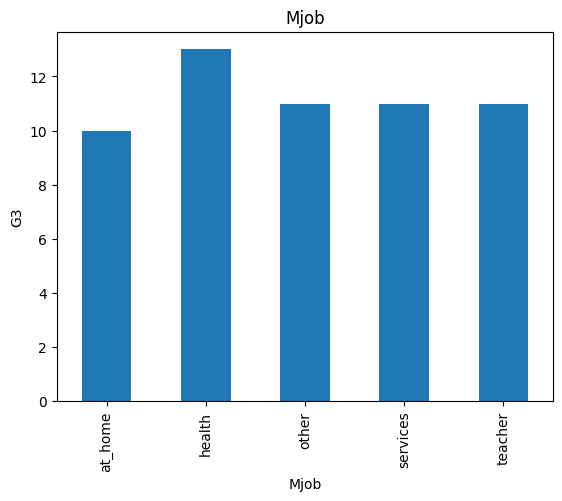

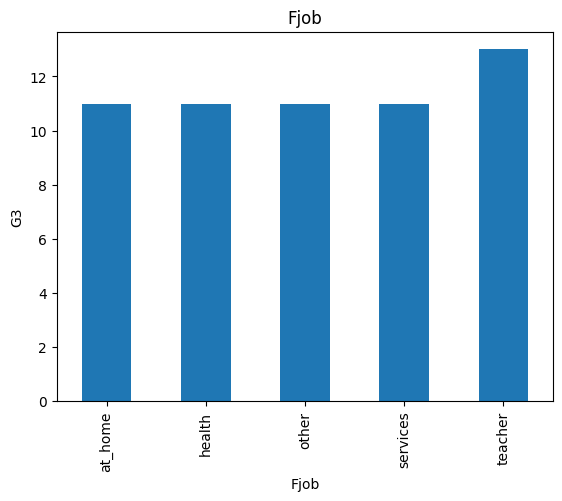

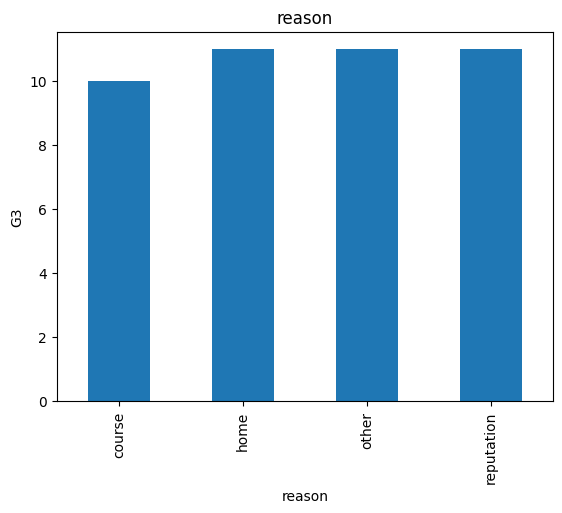

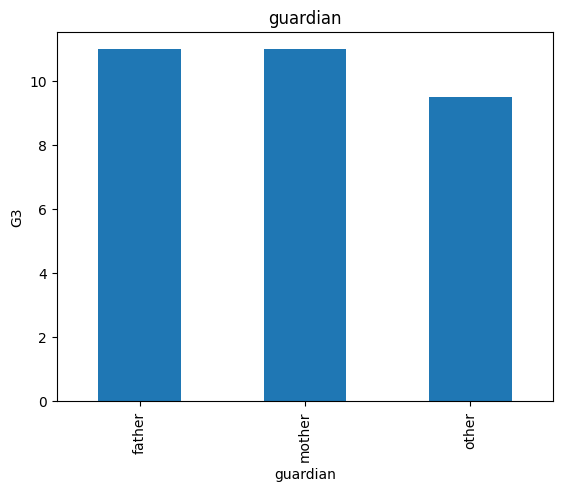

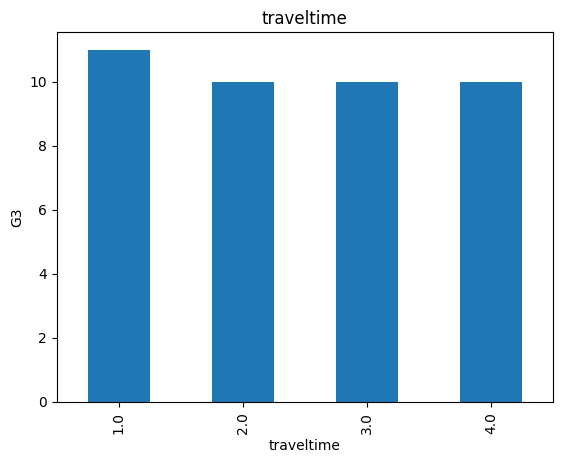

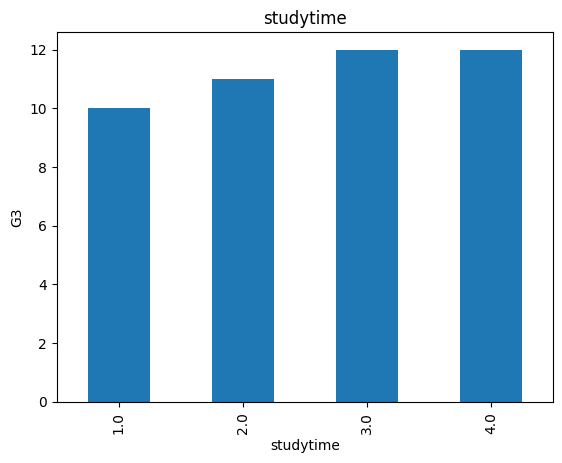

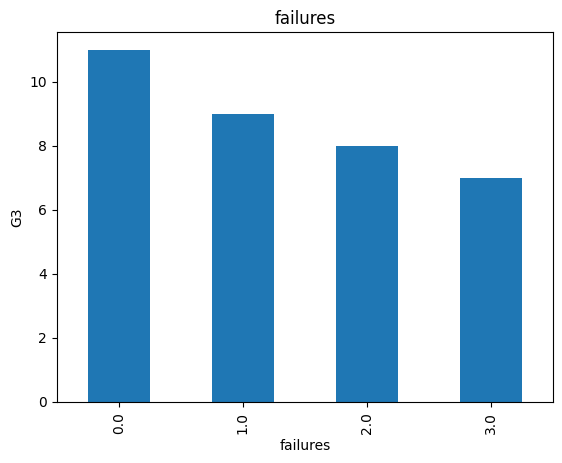

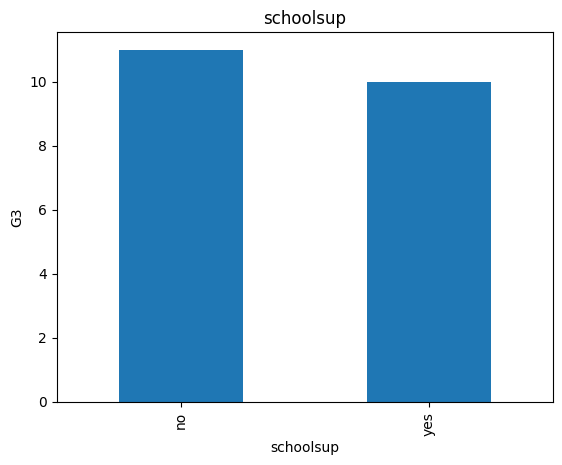

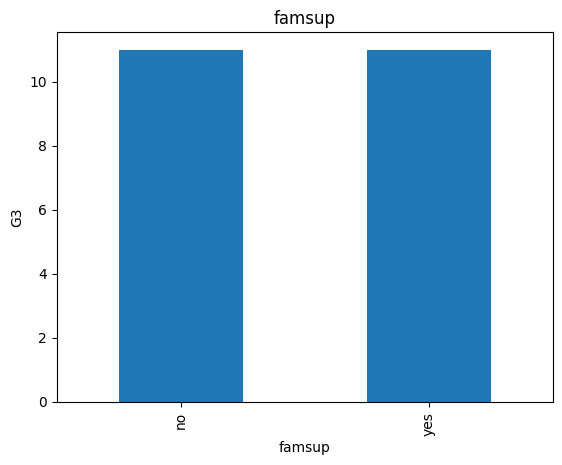

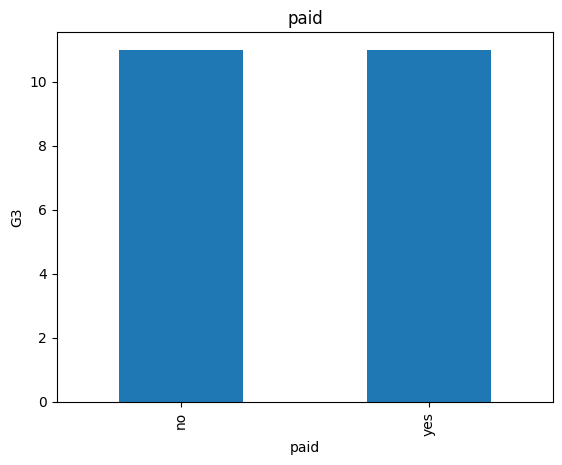

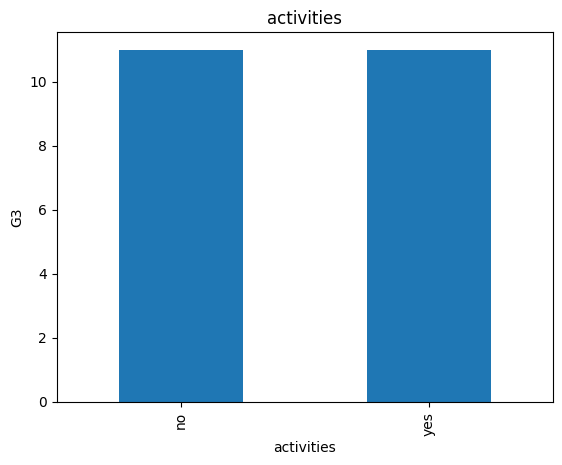

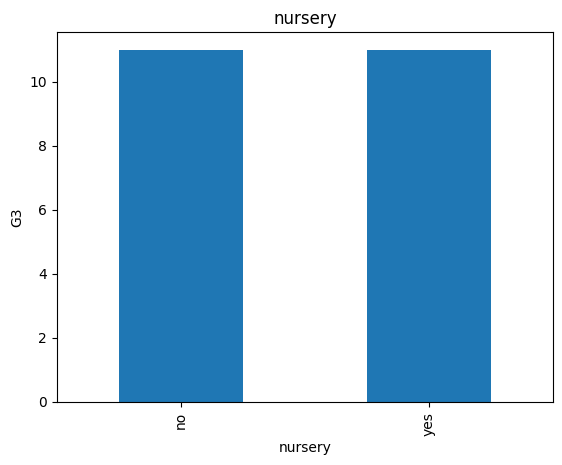

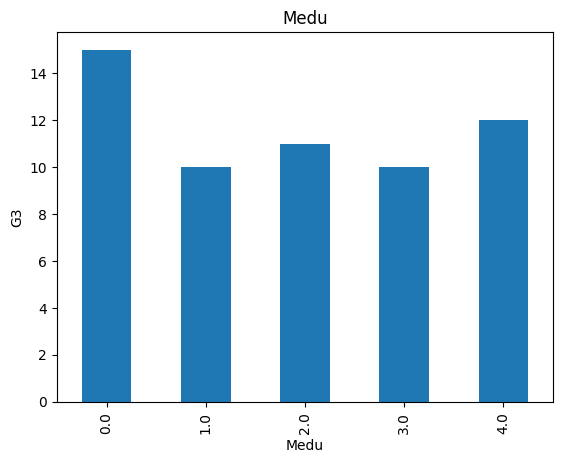

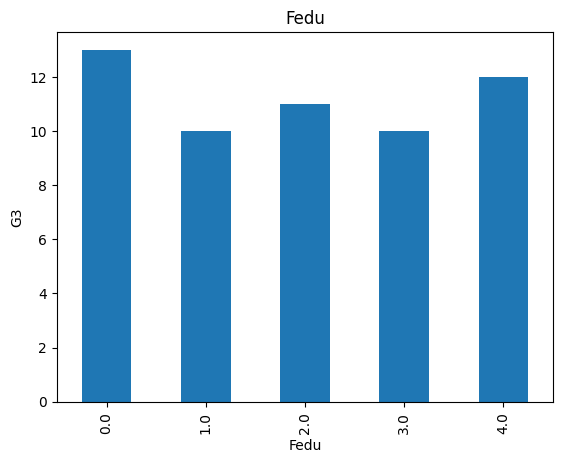

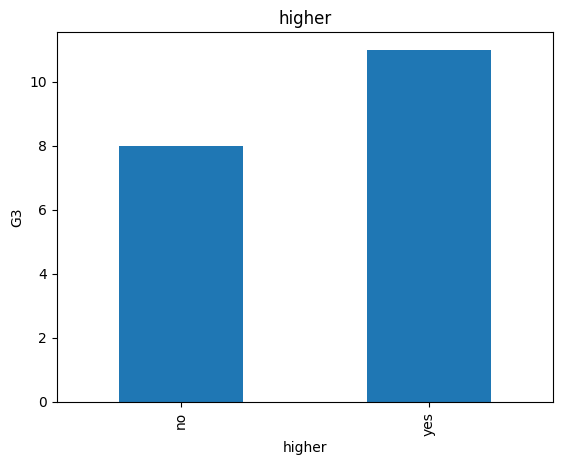

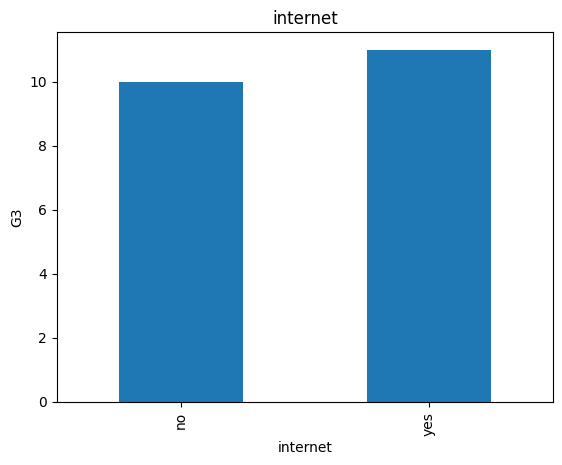

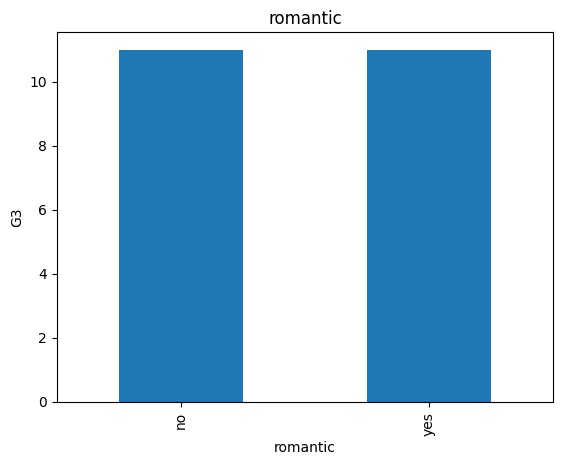

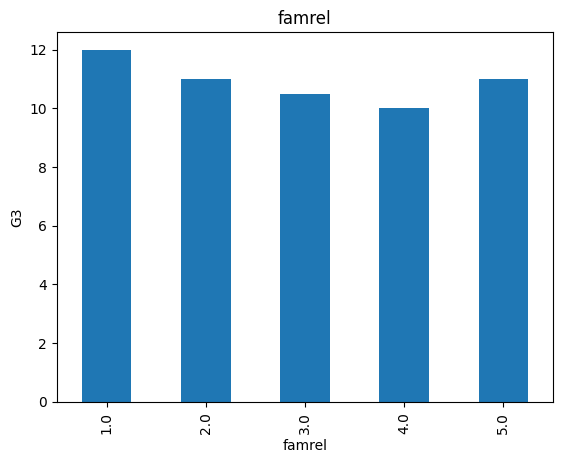

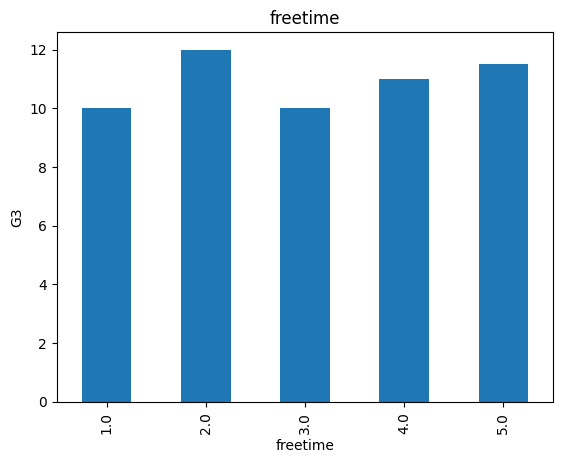

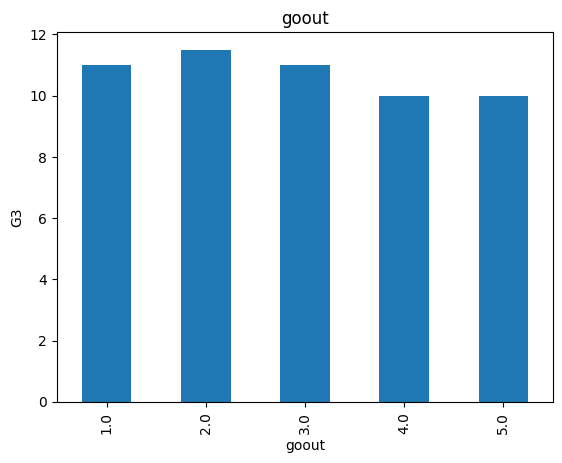

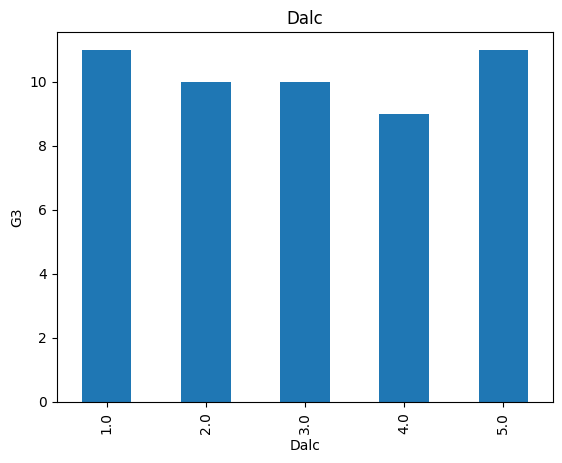

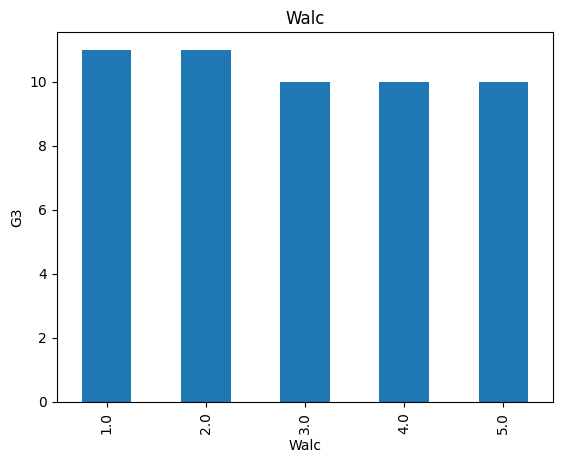

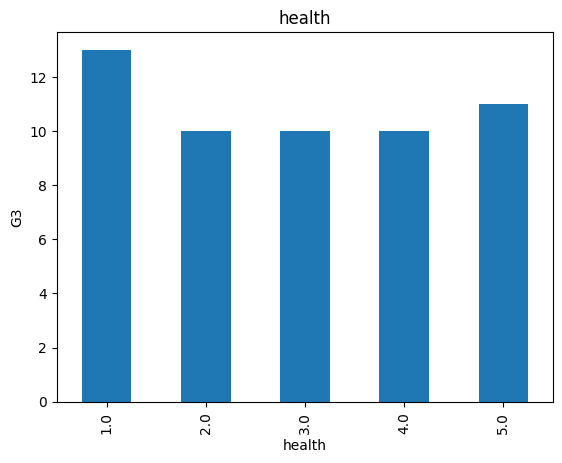

In [22]:
vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
                 'nursery', 'Medu', 'Fedu', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

for features in vars:
    df_student.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

Correlation Coefficient every variables

In [23]:
df_encoded = pd.get_dummies(df_student, drop_first=True)

correlation_matrix = df_encoded.corr()
g3_correlations = correlation_matrix['G3'].sort_values(ascending=False)

print(g3_correlations)

G3                   1.000000
G2                   0.905238
G1                   0.802676
Medu                 0.220783
higher_yes           0.179180
Fedu                 0.155256
Mjob_health          0.117732
internet_yes         0.114395
address_U            0.113765
paid_yes             0.108440
studytime            0.104015
reason_reputation    0.099748
sex_M                0.098686
Fjob_teacher         0.086338
famsize_LE3          0.085860
Mjob_services        0.082570
Mjob_teacher         0.060608
Fjob_health          0.058439
famrel               0.050468
nursery_yes          0.047030
absences             0.037944
reason_other         0.033949
activities_yes       0.024161
guardian_mother      0.016733
freetime             0.013131
reason_home         -0.016179
Fjob_services       -0.023509
famsup_yes          -0.028556
Fjob_other          -0.043996
Dalc                -0.049826
Pstatus_T           -0.051873
Walc                -0.052185
school_MS           -0.058925
health    

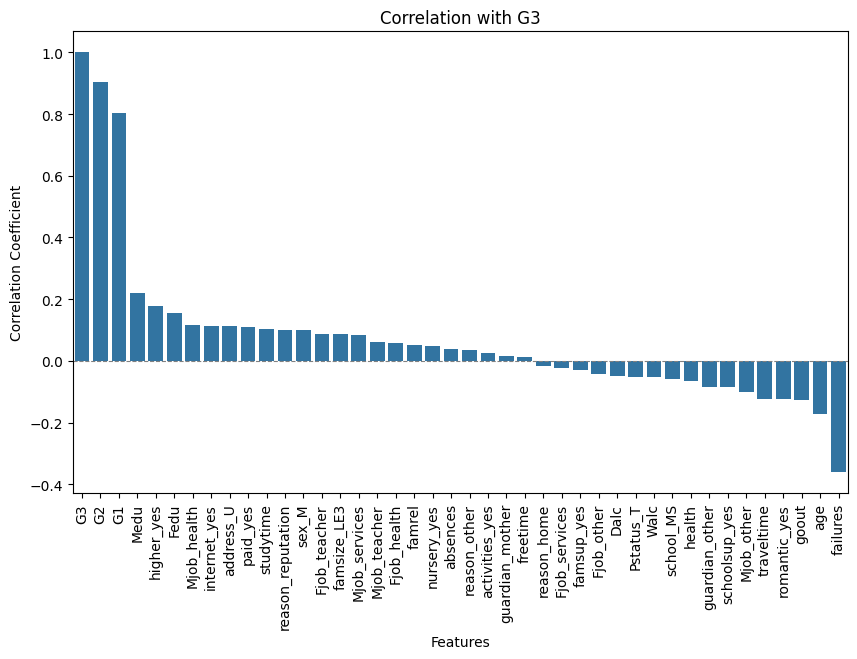

In [24]:
df_encoded = pd.get_dummies(df_student, drop_first=True)

correlation_matrix = df_encoded.corr()
g3_correlations = correlation_matrix['G3'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=g3_correlations.index, y=g3_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation with G3')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.show()

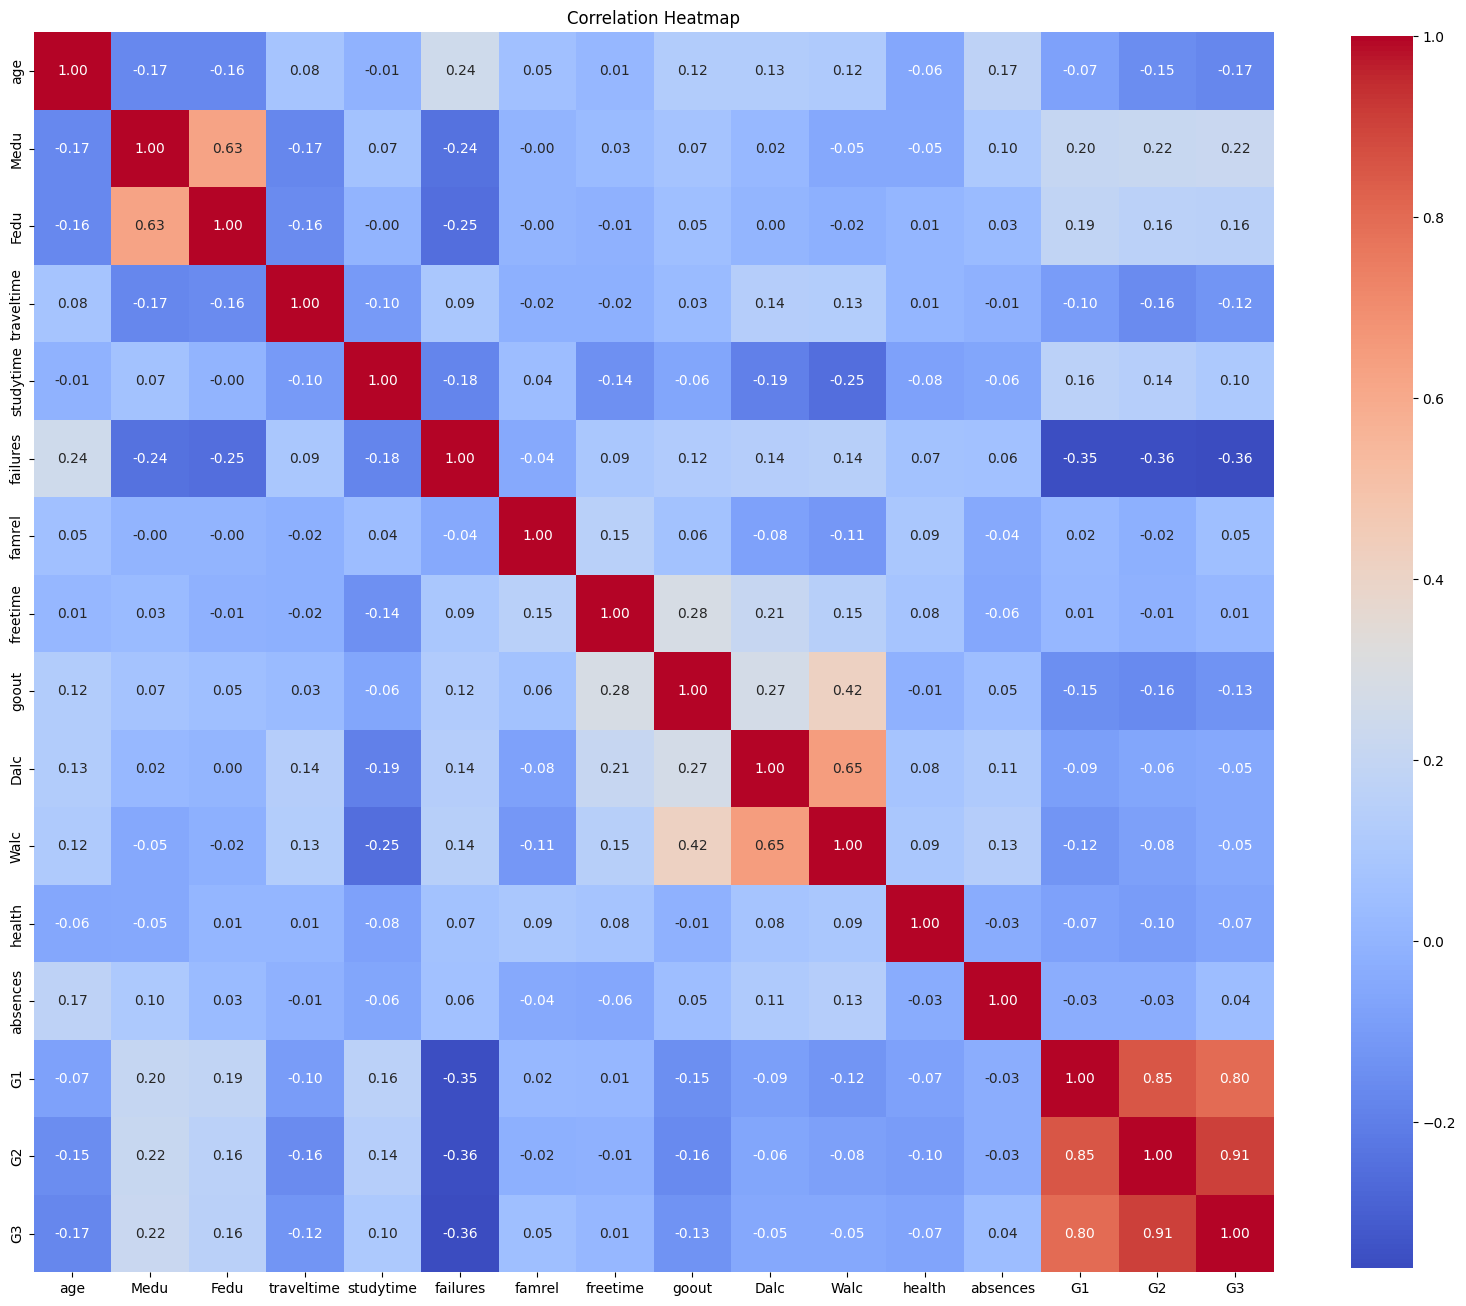

In [25]:
correlation_matrix = df_student.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()